---
title: STATS 3DA3
subtitle: Homework Assignment 6
author: "Shujia Zhang(400390028), Yunxin Li(), Ling Dai(400220798)"
date: 04/17/2024
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true
fontsize: 11pt
geometry: margin = 1in
linestretch: 1.5
bibliography: ass6.bib
---

\newpage

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [114]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [115]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [116]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [117]:
y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [118]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [119]:
y.dtypes

class    object
dtype: object

In [120]:
#to see if "rbc" is binary, since from the website inormation I found that this variable should be binary.
X['rbc'].value_counts()

rbc
normal      201
abnormal     47
Name: count, dtype: int64

In [121]:
#to see if "pc" is binary, since from the website inormation I found that this variable should be binary.
X['pc'].value_counts()

pc
normal      259
abnormal     76
Name: count, dtype: int64

In [122]:
#to see if "pcc" is binary, since from the website inormation I found that this variable should be binary.
X['pcc'].value_counts()

pcc
notpresent    354
present        42
Name: count, dtype: int64

In [123]:
#to see if "ba" is binary, since from the website inormation I found that this variable should be binary.
X['ba'].value_counts()

ba
notpresent    374
present        22
Name: count, dtype: int64

In [124]:
#to see if "htn" is binary, since from the website inormation I found that this variable should be binary.
X['htn'].value_counts()

htn
no     251
yes    147
Name: count, dtype: int64

In [125]:
#to see if "dm" is binary, since from the website inormation I found that this variable should be binary.
X['dm'].value_counts()

dm
no      260
yes     137
\tno      1
Name: count, dtype: int64

In [126]:
#find that "dm" is not binary, but it should be binary.
X_cat = set(X["dm"])
X_cat

{'\tno', nan, 'no', 'yes'}

From the introduction, there is only two observations in this data set. However, for variable "diabetes mellitus" there are there assigned observation. One is "No" which represent people which does not have diabetes mellitus; observation "Yes" implies people which does have diabetes mellitus. As a result, we may considered that "\tno" is a wrong input and correct it by replacing the observation "no".

In [127]:
#make "dm" become binary
X['dm'] = X['dm'].replace('\tno', 'no')
X_cat = set(X["dm"])
X_cat

/var/folders/t7/fhrwqn1s6810tvdnfvsd69g00000gn/T/ipykernel_57777/1663051033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dm'] = X['dm'].replace('\tno', 'no')


{nan, 'no', 'yes'}

In [128]:
#to double check if "dm" is binary now.
X['dm'].value_counts()

dm
no     261
yes    137
Name: count, dtype: int64

In [129]:
#to see if "cad" is binary, since from the website inormation I found that this variable should be binary.
X['cad'].value_counts()

cad
no     364
yes     34
Name: count, dtype: int64

In [130]:
#to see if "appet" is binary, since from the website inormation I found that this variable should be binary.
X['appet'].value_counts()

appet
good    317
poor     82
Name: count, dtype: int64

In [131]:
#to see if "pe" is binary, since from the website inormation I found that this variable should be binary.
X['pe'].value_counts()

pe
no     323
yes     76
Name: count, dtype: int64

In [132]:
#to see if "ane" is binary, since from the website inormation I found that this variable should be binary.
X['ane'].value_counts()

ane
no     339
yes     60
Name: count, dtype: int64

In [133]:
#to see if "class" is binary, since from the website inormation I found that this variable should be binary.
y['class'].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [134]:
#find "class" is not binary, but it should be ninary.
y_cat = set(y["class"])
y_cat

{'ckd', 'ckd\t', 'notckd'}

Same as the variable "class", there are three observation in this target variable. Observation "ckd" means people who have chronic kidney disease, and "notckd" implies people who does not have chronic kidney disease. Therefore, observation "ckd\t" is a wrong input, so replacing "ckd\t" by "ckd".

In [135]:
# make itbecome binary
y['class'] = y['class'].replace('ckd\t', 'ckd')
y_cat = set(y["class"])
y_cat

/var/folders/t7/fhrwqn1s6810tvdnfvsd69g00000gn/T/ipykernel_57777/3205154435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace('ckd\t', 'ckd')


{'ckd', 'notckd'}

In [136]:
#To double check if it is binary now.
y['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [137]:
# number of missing values in X
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [138]:
# number of missing values in y
y.isnull().sum()

class    0
dtype: int64

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

There are 400 observations and 25 variables in Chronic Kidney Disease dataset. There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc". There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss". In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the response is binary.

There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44 missing values in "bgr", 19 missing values in "bu", 17 missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2 missing values in "htn", 2 missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

In [139]:
X1 = X.copy()
columns_to_convert = ['sg', 'al','su']
for col in columns_to_convert:
    X1[col] = pd.Categorical(X1[col])

object_convert =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
for col in object_convert:
    X1[col] = X1[col].astype('category').cat.codes
X1.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc          int8
pc           int8
pcc          int8
ba           int8
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn          int8
dm           int8
cad          int8
appet        int8
pe           int8
ane          int8
dtype: object

In [140]:
#cat = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
#X = pd.get_dummies(X,columns=cat)
#caty = ['class']
#y = pd.get_dummies(y,columns=caty)

In [141]:
X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [142]:
X1['sg'].value_counts()

sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64

In [143]:
#why 3 categories?
X1['rbc'].value_counts()

rbc
 1    201
-1    152
 0     47
Name: count, dtype: int64

In [144]:
X1['pe'].value_counts()

pe
 0    323
 1     76
-1      1
Name: count, dtype: int64

In [145]:
float_col = X1.select_dtypes(include=['float64']).columns
object_col = X1.select_dtypes(include=['object']).columns

In [146]:
#way2
binary = {'rbc':{'normal':1,'abnormal':0},
          'pc':{'normal':1,'abnormal':0},
          'pcc':{'present':1,'notpresent':0},
          'ba':{'present':1,'notpresent':0},
          'htn':{'yes':1,'no':0},
          'dm':{'yes':1,'no':0},
          'cad':{'yes':1,'no':0},
          'appet':{'good':1,'poor':0},
          'pe':{'yes':1,'no':0},
          'ane':{'yes':1,'no':0}
          
          }

for i,j in binary.items():
    X1[i] = X1[i].replace(j)

X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [147]:
scale = StandardScaler()
X1[float_col] = scale.fit_transform(X1[float_col])
X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,-1,1,0,0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1,1,0,0,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,-1,1,0,0,NaN,...,-0.421688,-0.098536,-0.818559,NaN,0,0,0,0,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064,...,-1.006202,-0.878356,-0.308261,NaN,0,1,0,1,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,1,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,...,1.091172,0.904090,-0.580420,0.188159,0,0,0,0,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,...,1.366237,1.683910,-0.206202,1.458415,0,0,0,0,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,...,1.125555,1.126896,-0.614440,0.676719,0,0,0,0,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,...,0.575424,1.349701,-0.410321,1.165279,0,0,0,0,0,0


3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [148]:
X1.describe()

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,3.910000e+02,3.880000e+02,400.00000,400.000000,400.000000,400.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,...,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,9.994847e-17,-2.380684e-16,0.12250,0.485000,0.095000,0.045000,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,...,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16,0.362500,0.337500,0.080000,0.202500,0.187500,0.147500
std,1.001281e+00,1.001291e+00,0.93256,0.759089,0.325946,0.251262,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,...,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00,0.491628,0.483921,0.289499,0.408547,0.397163,0.362038
min,-2.885708e+00,-1.936857e+00,-1.00000,-1.000000,-1.000000,-1.000000,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,...,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-5.530393e-01,-4.733701e-01,-1.00000,0.000000,0.000000,0.000000,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,...,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,1.00000,1.000000,0.000000,0.000000,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,...,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,1.00000,1.000000,0.000000,0.000000,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,...,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.00000,1.000000,1.000000,1.000000,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,...,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
X1.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc          int8
pc           int8
pcc          int8
ba           int8
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn          int8
dm           int8
cad          int8
appet        int8
pe           int8
ane          int8
dtype: object

Since there are 25 variables and 400 observations in Chronic Kidney Disease dataset. 

1).There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc".
There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".
In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the response is binary.

2).The number of features is 24, and they are: "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc","rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".

3).The number of observations is 400.
But we can see that the count of some variables is less than 400, for example: the count of age is 391 which is less than 400. This means there are missing values in some varibales in this dataset.

4). The type of variables: There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc".
There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".
In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the respnse is binary.

5). Missing values: There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44  missing values in "bgr", 19  missing values in "bu", 17  missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2  missing values in "htn", 2  missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

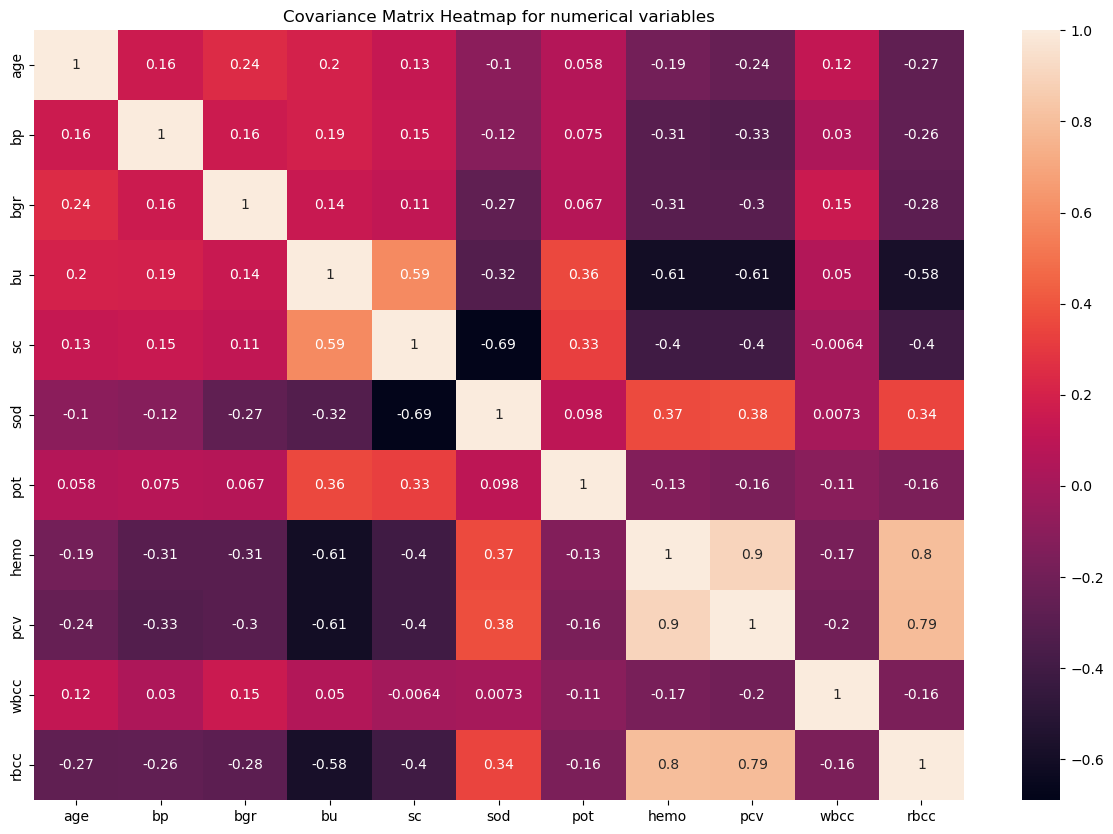

In [150]:
# prof says numerical variables shuold use heatmap, categorical variables should use use barplot.
#
#
#
#
#numerical variables:
float64=X1.select_dtypes(include=['float64'])
plt.figure(figsize=(15, 10))
sns.heatmap(float64.corr(), 
        annot=True)
plt.title('Covariance Matrix Heatmap for numerical variables')
plt.show()



In [151]:
#categorical=X1.select_dtypes(include=['category','int8'])
#sns.histplot(
#    data=categorical, 
#    color='random', 
#    edgecolor='black',
#    binwidth=0.25
#    )
#plt.xlabel('barplot')
#plt.ylabel('Frequency')
#plt.show()


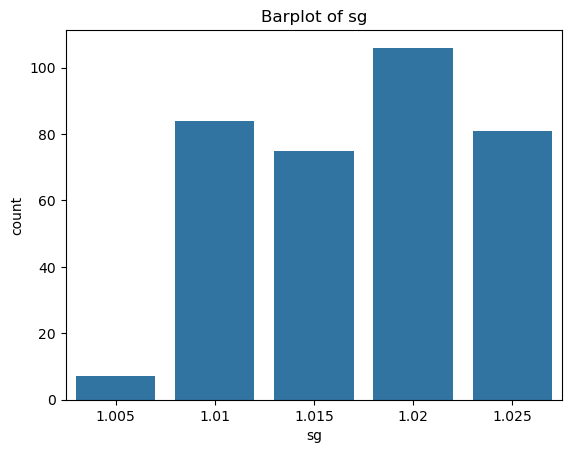

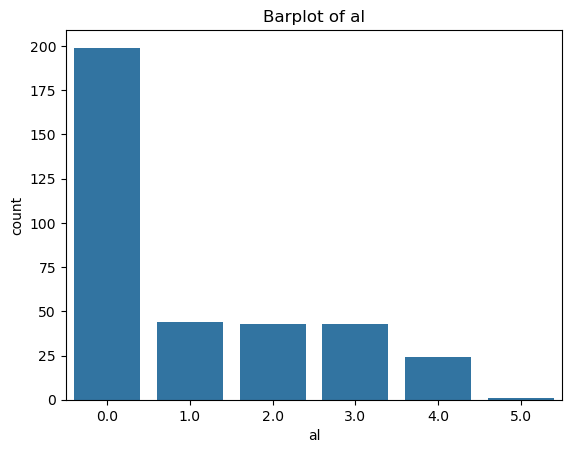

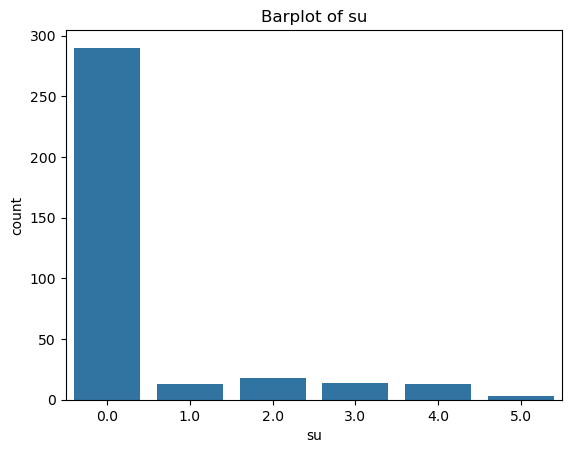

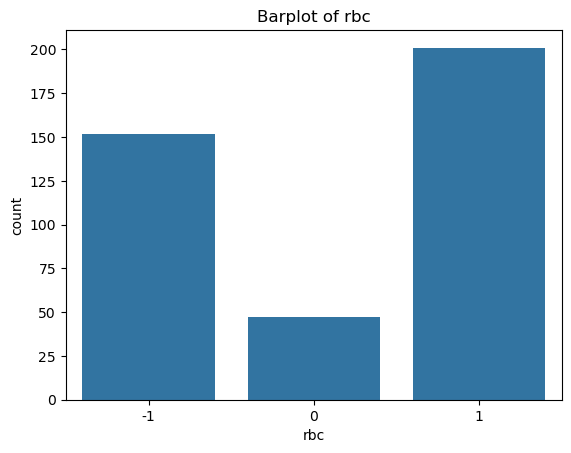

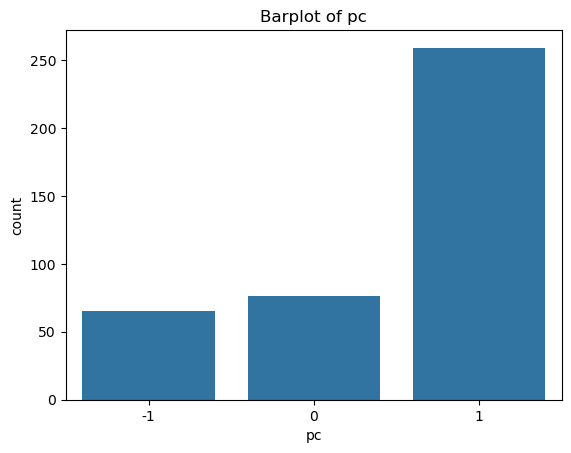

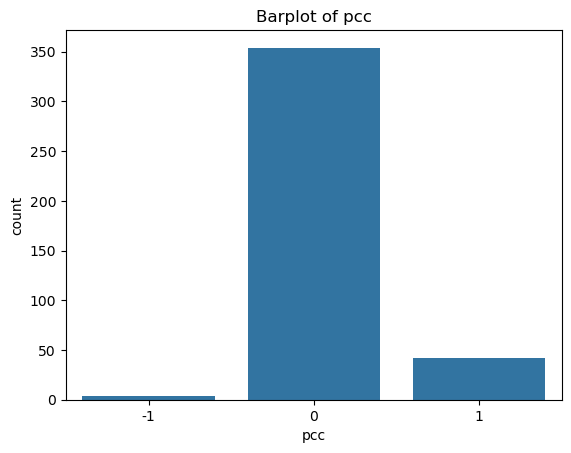

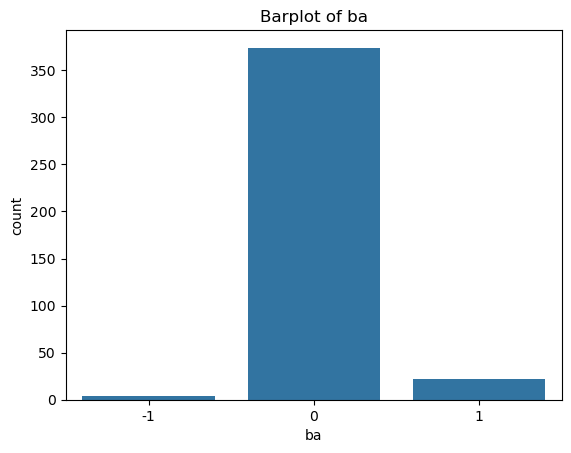

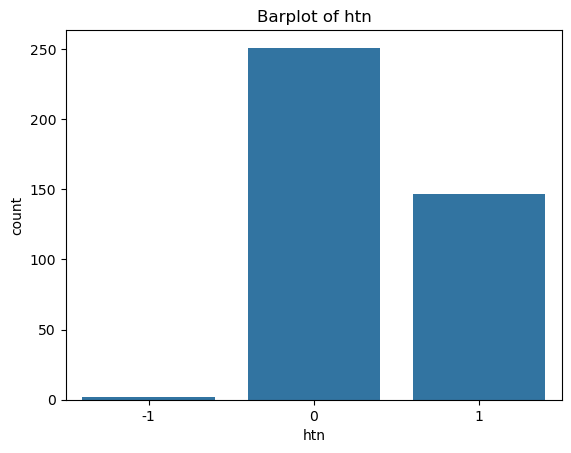

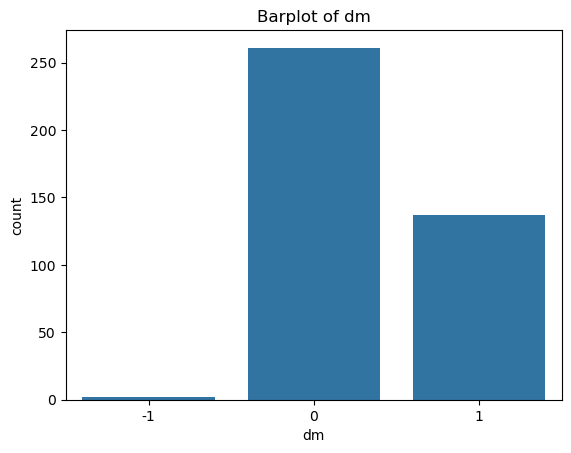

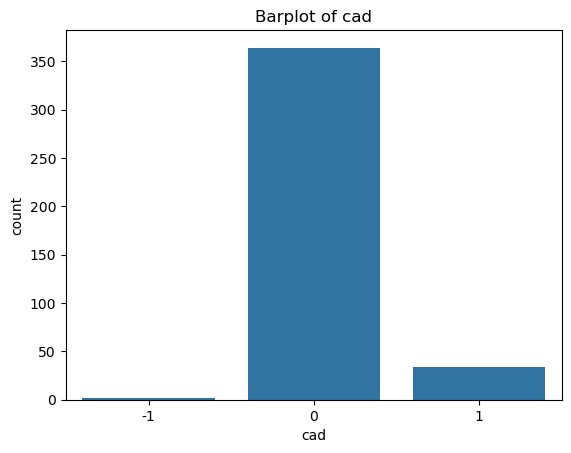

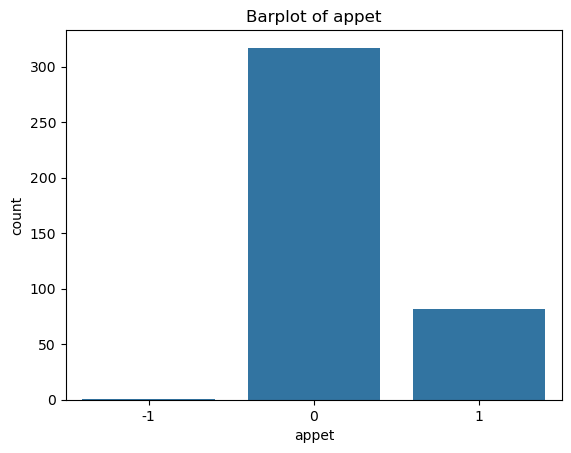

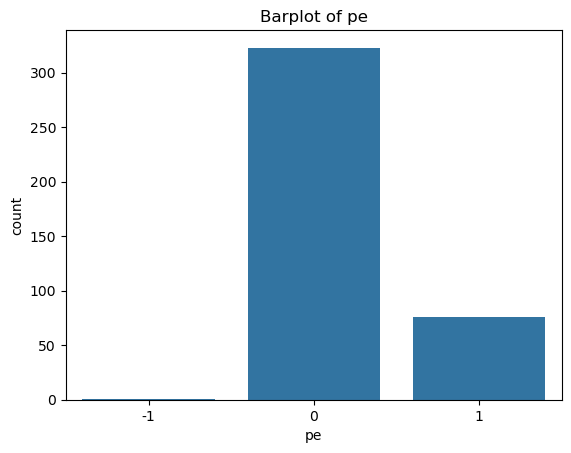

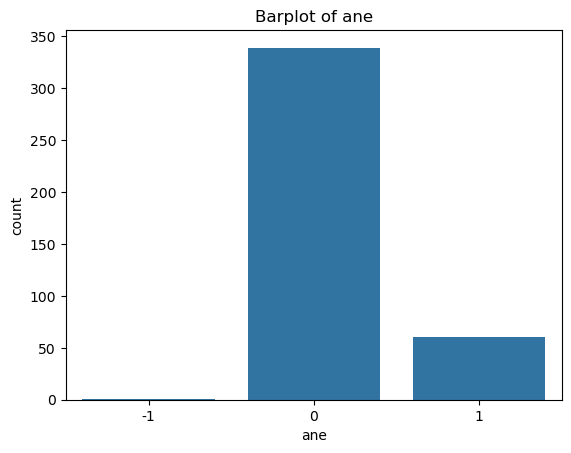

In [152]:
#categorical variables
categorical=X1.select_dtypes(include=['category','int8'])
for column in categorical.columns:
    plt.figure()
    sns.countplot(x=column, data=categorical)
    plt.title(f'Barplot of {column}')
    plt.show()

We use heatmap for numerical variables and barplot for categorical variables.

For heatmap:

1). This is a symmetric matrix and the elements on the diagonal are the variance. The diagonal of the correlation matrix is 1. 

2). The elements not on the diagonal are the covariance.

3). The smallest number in the matrix is -0.69 which means "sod" and "sc" are neagtively correlated.

4). The largest number in the matrix is 1 (the diagonal).

5). The largest number other than 1 is 0.9 which means "hemo" and "pcv" are positively correlated.

For barplots:

1). In those binary variables, the category “-1” could suggest missing data.

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [153]:
# prof says cannot drop all the missing values ,44包括44以上都要drop variables
# 不确定是   dropped numerical variable can replaced by mean 
# 还是       在没有被dropped掉的variables里的missing values 可以replaced by mean.
# When missing vlues is too large, lets say 90 missing vlues out of 100, then even though we use althorithm to work on them, we learn nothing from it.
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [154]:
y.isnull().sum()

class    0
dtype: int64

In [155]:
#way2
float_na=X1[float_col].isna()
float_nasum=float_na.sum()
print(float_nasum)

cat_na=X1[columns_to_convert].isna()
cat_nasum=cat_na.sum()
print(cat_nasum)

binary_na = (X1[object_convert] == -1)
binary_nasum=binary_na.sum()
print(binary_nasum)

age       9
bp       12
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64
sg    47
al    46
su    49
dtype: int64
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


Missing values: There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44  missing values in "bgr", 19  missing values in "bu", 17  missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2  missing values in "htn", 2  missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

If the count of missing value is greater than 44, we would like to drop the whole columns from the data set.

In [156]:
missing_values_count = X1.isna().sum()
columns_to_drop = missing_values_count[missing_values_count > 44].index
columns_to_drop

Index(['sg', 'al', 'su', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'], dtype='object')

In [157]:
X1_dropped = X1.drop(columns=columns_to_drop)
X1_dropped

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,-1,1,0,0,-0.341498,-0.424804,-0.326574,1,1,0,0,0,0
1,-2.594124,-1.936857,-1,1,0,0,NaN,-0.781687,-0.396338,0,0,0,0,0,0
2,0.613295,0.258373,1,1,0,0,3.473064,-0.087748,-0.221928,0,1,0,1,0,1
3,-0.203139,-0.473370,1,0,1,0,-0.392022,-0.028268,0.126891,1,0,0,1,1,1
4,-0.028189,0.258373,1,1,0,0,-0.530963,-0.623073,-0.291692,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1,1,0,0,-0.101509,-0.167055,-0.448661,0,0,0,0,0,0
396,-0.553039,-0.473370,1,1,0,0,-0.922524,-0.523939,-0.326574,0,0,0,0,0,0
397,-2.302541,0.258373,1,1,0,0,-0.606749,-0.623073,-0.431220,0,0,0,0,0,0
398,-2.010957,-1.205114,1,1,0,0,-0.429915,-0.147229,-0.361456,0,0,0,0,0,0


In [158]:
numerical_cols = X1.select_dtypes(include=['number']).columns
column_means = X1[numerical_cols].mean()

X1_filled = X1.copy()
X1_filled[numerical_cols] = X1_filled[numerical_cols].fillna(column_means)

Replacing the missing value by the mean of the variables for numerical variables.

In [159]:
from sklearn.impute import SimpleImputer

In [160]:
obj_col = X1_filled.select_dtypes(include=['category']).columns.tolist()
cat_imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
X1_filled.loc[:, obj_col] = cat_imputer.fit_transform(X1_filled.loc[:, obj_col])

#output with categorial variables have all the input replacing by na???

In [161]:
X1_filled.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

Replacing the missing value by the most frequency input of the variables for categorical variables.

The reason for not strategy for addressing them is : ???????????????????????????????????????

In some algorithms, the missing values can be seen as a seperate category. 
For instance, in decision tree, KNN, etc.

6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

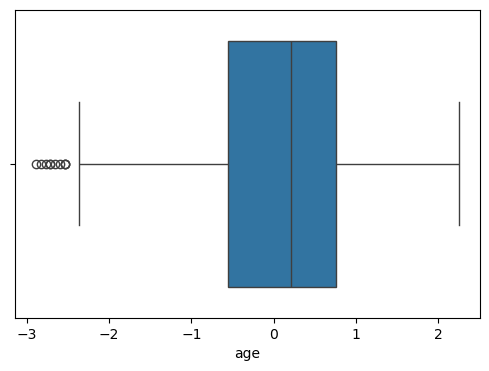

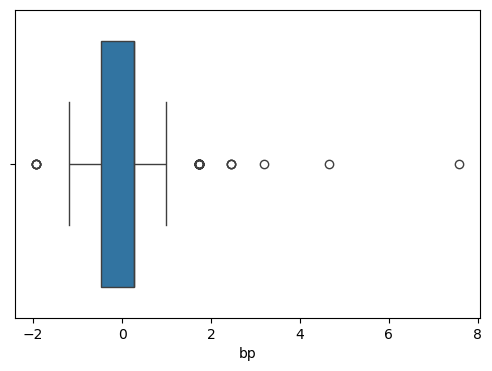

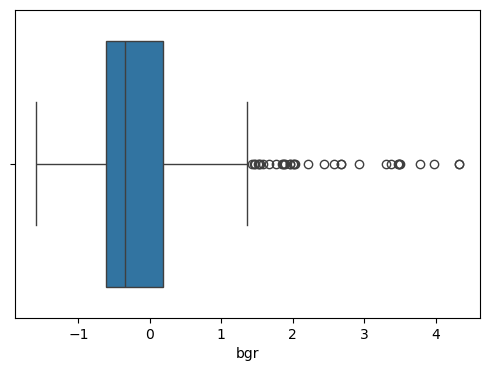

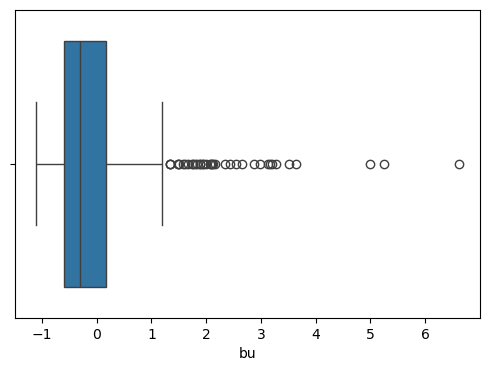

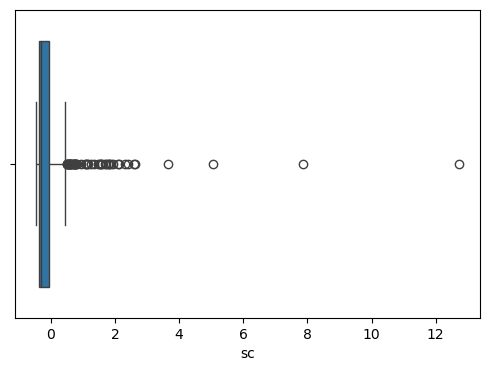

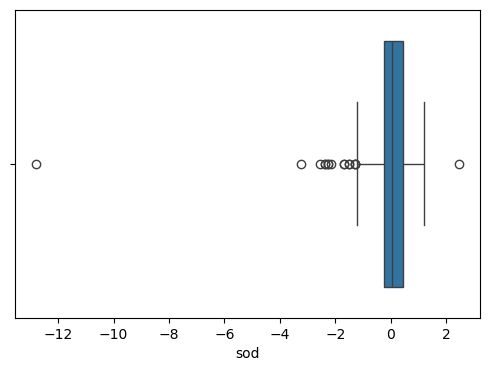

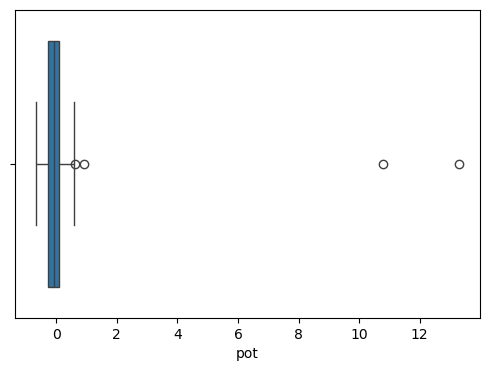

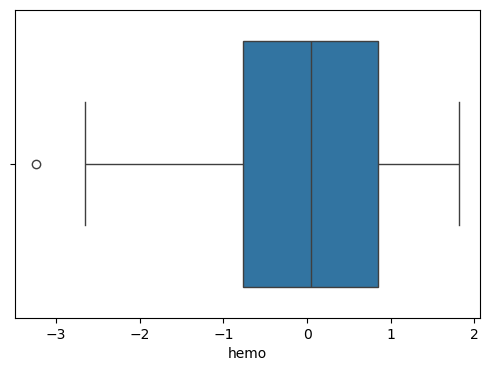

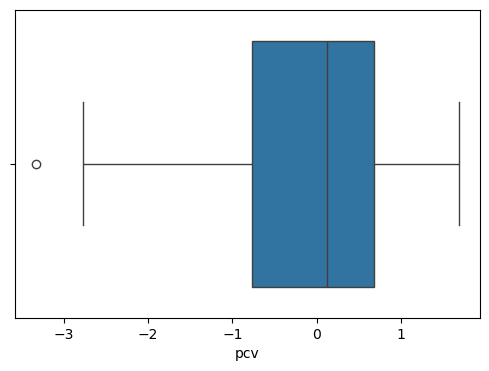

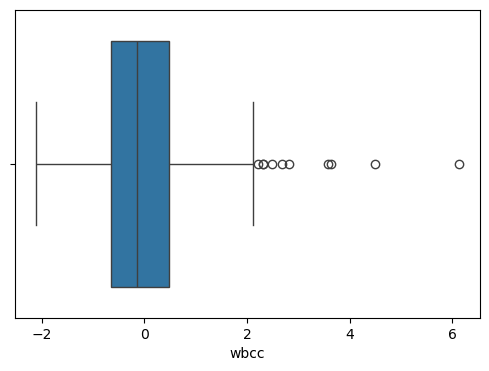

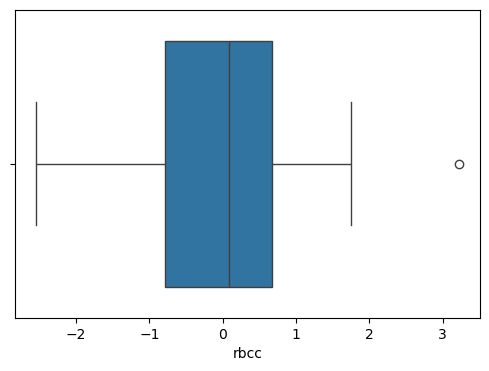

In [162]:
for col in float_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X1.select_dtypes(include=['float64'])[col])
    plt.xlabel(col)
    plt.show()

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

In [163]:
#prof says use K-means
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm
from sklearn.impute import KNNImputer

In [164]:
y['class'] = y["class"].astype('category').cat.codes
y

/var/folders/t7/fhrwqn1s6810tvdnfvsd69g00000gn/T/ipykernel_57777/3718594032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y["class"].astype('category').cat.codes


,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [165]:
km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(y)
km1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [166]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X1), columns=X1.columns)
X_imputed.head()
X_imputed.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

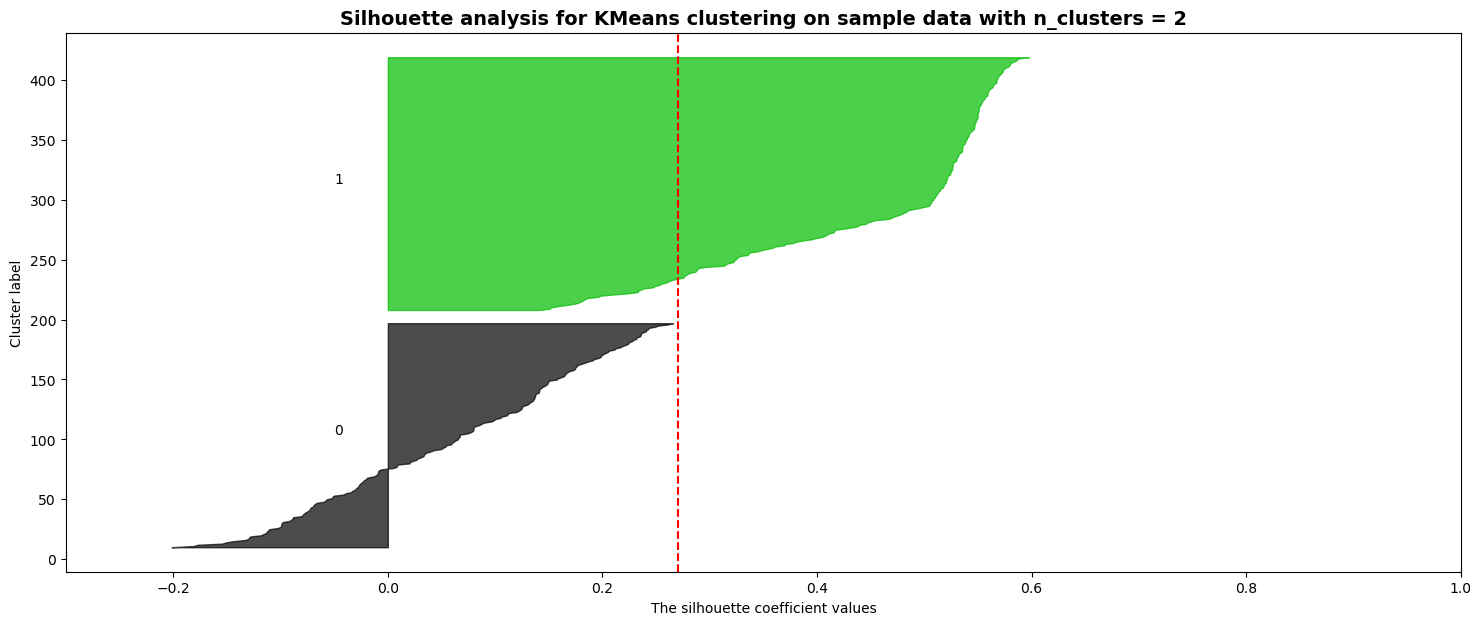

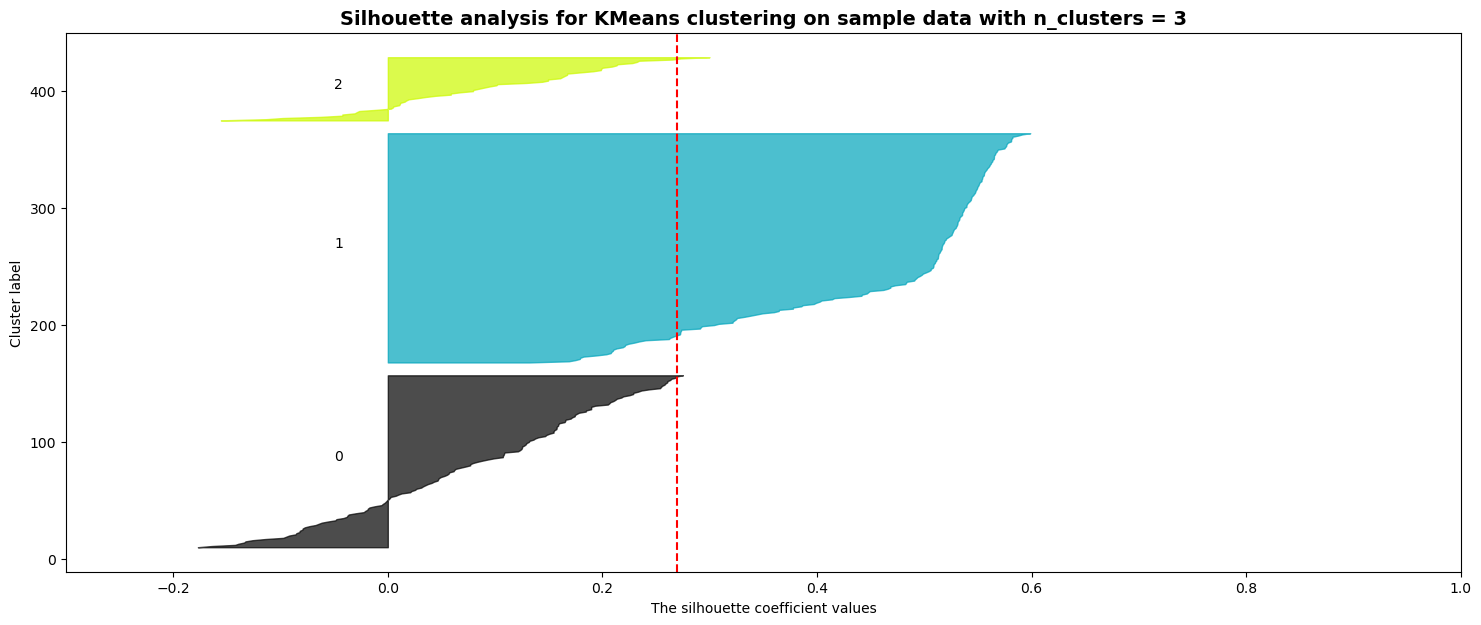

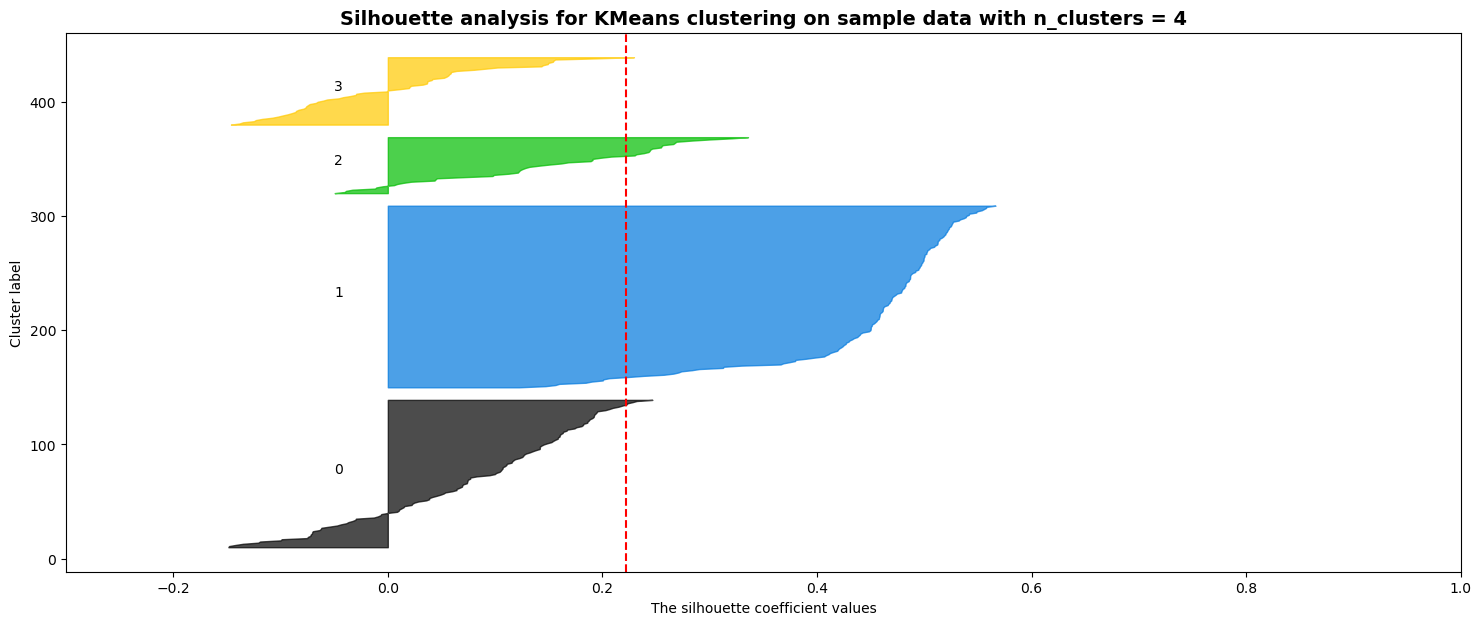

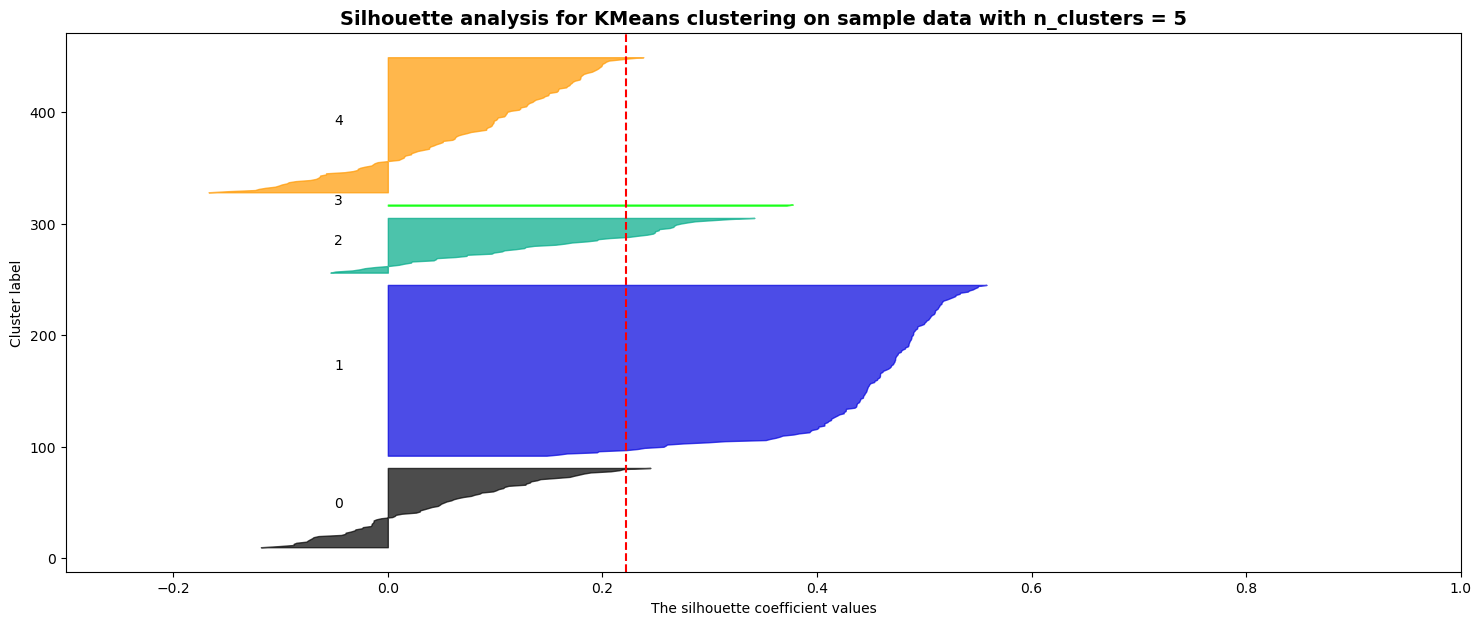

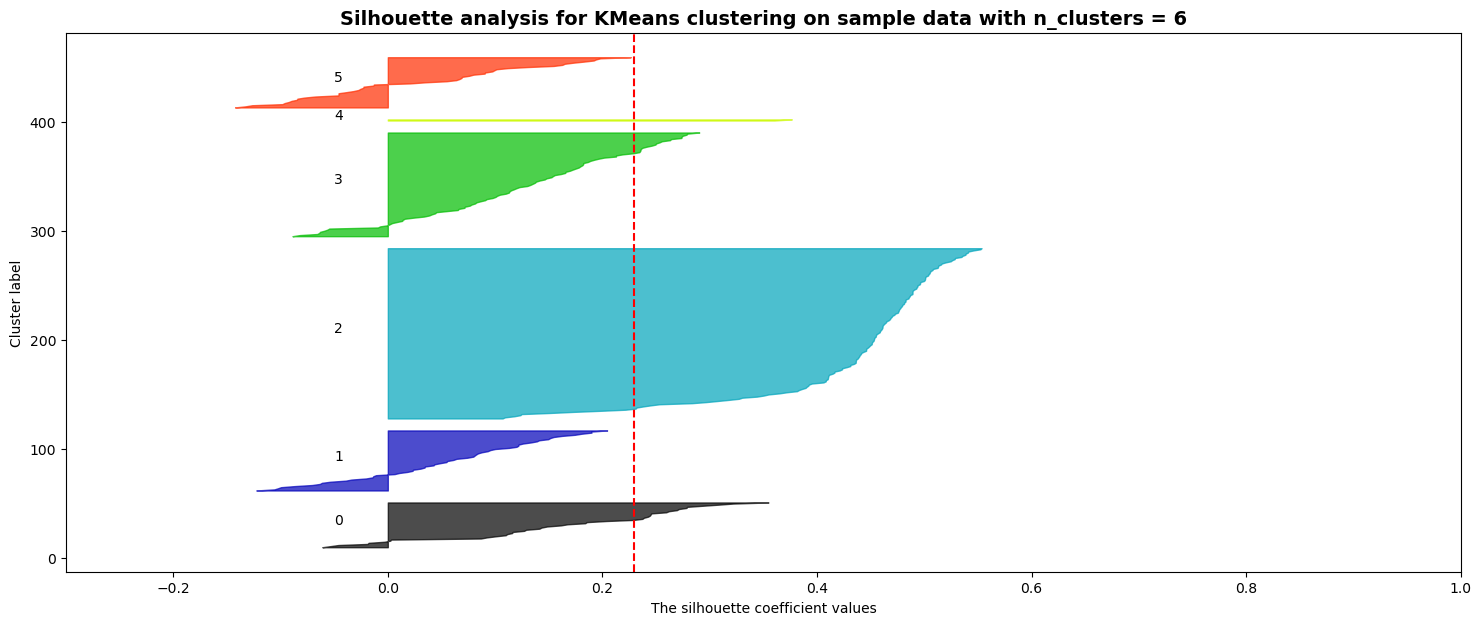

In [167]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    labels = km.fit_predict(X_imputed)
    
    silhouette_avg = silhouette_score(X_imputed, labels)
    sample_silhouette_values = silhouette_samples(X_imputed, labels)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Use the colormap for coloring
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [168]:
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0)
labels = kmeans.fit_predict(y)
labels

/Users/shujiazhang/anaconda3/envs/proj02/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [169]:
pca_X = PCA()
X = pd.DataFrame(X_imputed, X_imputed.index, X_imputed.columns)

In [170]:
pca_loading = pd.DataFrame(pca_X.fit(X).components_.T, index=X_imputed.columns, columns=[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
            'pc21', 'pc22', 'pc23', 'pc24']])
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
age,0.156615,-0.256156,0.296261,-0.181368,-0.195783,-0.743626,-0.108982,-0.364523,0.004068,0.107559,...,0.016029,0.102695,0.050639,-0.009219,0.068935,-0.022615,-0.006766,0.019870,0.003844,-0.000110
bp,0.165419,-0.133481,0.168815,-0.224867,-0.413232,0.270203,0.756642,-0.159936,0.144635,-0.011502,...,-0.048056,-0.003041,-0.011978,0.000560,0.051114,0.020580,-0.009248,0.015444,-0.027036,0.000082
sg,-0.001486,0.000263,0.000434,0.000653,-0.000498,-0.000113,0.000232,-0.000624,-0.000284,-0.000863,...,0.000127,-0.000147,0.000941,-0.000687,-0.000438,-0.000120,0.001592,0.000910,-0.000120,-0.999995
al,0.424291,0.068980,-0.565137,0.272661,0.106037,0.027580,0.029130,-0.487872,0.303950,0.129721,...,-0.013722,-0.042482,0.022809,-0.023232,0.030248,-0.114750,0.037230,0.033508,-0.031738,-0.000719
su,0.213155,-0.613896,0.111647,0.256448,0.053616,0.198063,-0.070589,0.161718,-0.004202,-0.113372,...,-0.067581,0.125156,0.055598,-0.024095,-0.047664,-0.019644,0.065006,-0.077278,-0.011351,-0.000287
rbc,-0.161978,0.110159,-0.140996,0.550418,-0.187549,-0.225437,0.254854,-0.142885,-0.434442,-0.233328,...,0.122688,-0.028327,0.020295,0.058768,0.052567,-0.018889,0.018862,-0.017936,-0.009305,0.001474
pc,-0.168338,0.004253,-0.065263,0.123251,-0.089829,-0.014353,0.203474,0.020591,-0.477395,0.496019,...,-0.013742,-0.031551,0.009664,-0.016047,-0.011492,-0.013983,-0.053711,0.009469,-0.000702,-0.000382
pcc,0.051266,-0.008707,-0.062040,0.019624,0.007327,-0.052007,0.018492,-0.039052,-0.035967,0.006489,...,-0.201865,0.183257,-0.220529,0.221336,-0.551457,0.341468,-0.452970,-0.132150,-0.388064,-0.001152
ba,0.030523,0.001880,-0.046126,0.018231,-0.006018,-0.008405,0.029943,-0.038086,0.000650,-0.006133,...,-0.077783,0.123740,-0.197913,0.165805,-0.139072,0.206125,-0.123401,-0.067312,0.902609,-0.000760
bgr,0.213505,-0.502117,0.036458,0.178797,0.190201,0.111500,-0.012779,-0.010544,-0.296006,-0.048791,...,0.084004,-0.004372,-0.025440,-0.073509,0.084141,0.046270,-0.013893,0.017199,0.010928,-0.000403


In [171]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
            'pc21', 'pc22', 'pc23', 'pc24'], index=X.index)
pc_scores

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
0,-0.941469,-0.221506,0.160472,-0.642055,0.319197,0.328762,0.168565,-0.459622,0.794724,0.604680,...,-0.168636,-0.852936,-0.087955,-0.066477,-0.386734,-0.169453,-0.244923,-0.035168,0.099993,-0.002392
1,-0.022752,1.458910,-2.868530,0.415945,1.811575,2.038664,-1.402675,-0.637032,0.651732,0.954385,...,-0.092560,-0.224290,-0.012355,0.069337,0.039701,-0.316168,0.193172,0.007468,-0.106929,-0.006370
2,2.439877,-3.041215,-0.217767,1.353018,0.454186,0.568054,0.137498,-0.319426,-2.084047,-0.036390,...,0.431076,0.876774,0.513884,0.206781,0.106104,-0.815403,-0.027063,0.388074,0.049812,0.004604
3,2.253475,1.796020,-1.412102,0.733525,1.809787,-0.149814,0.381561,-1.967565,-0.301289,0.442893,...,-0.482283,0.892373,0.549199,-0.446831,-0.582711,0.183948,-0.116588,-0.159876,-0.357453,0.011256
4,-0.218097,0.594369,-0.978515,0.118648,-0.333497,0.023692,0.497379,-0.846541,-0.422096,0.487187,...,0.176366,0.029260,-0.096594,-0.005564,0.296744,-0.237440,0.102156,0.003539,-0.097190,0.007438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-2.137716,-0.326497,0.331007,0.214116,-1.126254,-0.155403,0.140903,-0.463086,-0.351727,-0.433227,...,0.037325,-0.108220,-0.059298,-0.095750,0.045427,-0.040030,-0.050770,0.026117,-0.004880,0.001617
396,-3.253251,0.170088,0.241850,0.766558,0.198489,-0.102029,0.343455,-0.302141,0.399551,-0.315128,...,-0.029567,-0.022486,0.224915,0.222983,-0.137521,0.128642,-0.030959,0.061182,0.016270,-0.001779
397,-2.786172,0.615492,-0.069327,0.695702,0.196981,1.670875,0.813828,0.154992,-0.144327,-0.178652,...,-0.308946,-0.171752,-0.027784,0.047453,-0.110992,0.085301,0.013679,-0.005912,-0.003052,0.002529
398,-2.761142,0.809085,-0.097688,1.271205,0.726701,1.034793,-0.277915,0.463400,-0.252632,-0.226754,...,-0.258331,-0.041856,0.250564,0.430501,-0.012220,0.299966,0.089426,-0.044743,0.012379,-0.002863


In [172]:
var=pc_scores.var()
var

pc1     5.217446
pc2     1.659990
pc3     1.256001
pc4     1.153263
pc5     1.000483
pc6     0.846363
pc7     0.804852
pc8     0.662652
pc9     0.566140
pc10    0.422836
pc11    0.308645
pc12    0.275374
pc13    0.189587
pc14    0.171593
pc15    0.158215
pc16    0.130312
pc17    0.100232
pc18    0.094163
pc19    0.089189
pc20    0.080199
pc21    0.070107
pc22    0.055833
pc23    0.043846
pc24    0.000016
dtype: float64

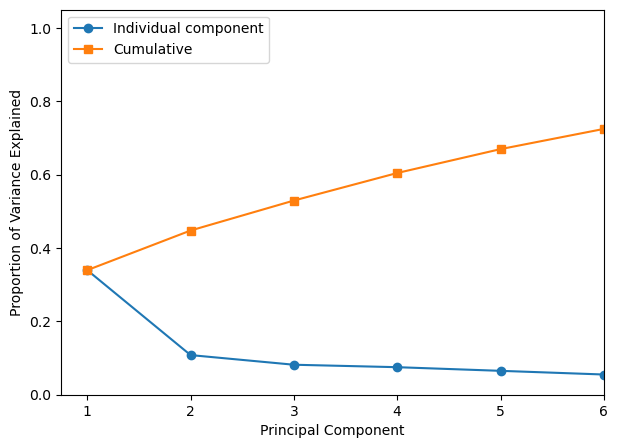

In [173]:
plt.figure(figsize=(7,5))

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
, pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
, np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

In [174]:
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
age,0.156615,-0.256156,0.296261,-0.181368,-0.195783,-0.743626,-0.108982,-0.364523,0.004068,0.107559,...,0.016029,0.102695,0.050639,-0.009219,0.068935,-0.022615,-0.006766,0.019870,0.003844,-0.000110
bp,0.165419,-0.133481,0.168815,-0.224867,-0.413232,0.270203,0.756642,-0.159936,0.144635,-0.011502,...,-0.048056,-0.003041,-0.011978,0.000560,0.051114,0.020580,-0.009248,0.015444,-0.027036,0.000082
sg,-0.001486,0.000263,0.000434,0.000653,-0.000498,-0.000113,0.000232,-0.000624,-0.000284,-0.000863,...,0.000127,-0.000147,0.000941,-0.000687,-0.000438,-0.000120,0.001592,0.000910,-0.000120,-0.999995
al,0.424291,0.068980,-0.565137,0.272661,0.106037,0.027580,0.029130,-0.487872,0.303950,0.129721,...,-0.013722,-0.042482,0.022809,-0.023232,0.030248,-0.114750,0.037230,0.033508,-0.031738,-0.000719
su,0.213155,-0.613896,0.111647,0.256448,0.053616,0.198063,-0.070589,0.161718,-0.004202,-0.113372,...,-0.067581,0.125156,0.055598,-0.024095,-0.047664,-0.019644,0.065006,-0.077278,-0.011351,-0.000287
rbc,-0.161978,0.110159,-0.140996,0.550418,-0.187549,-0.225437,0.254854,-0.142885,-0.434442,-0.233328,...,0.122688,-0.028327,0.020295,0.058768,0.052567,-0.018889,0.018862,-0.017936,-0.009305,0.001474
pc,-0.168338,0.004253,-0.065263,0.123251,-0.089829,-0.014353,0.203474,0.020591,-0.477395,0.496019,...,-0.013742,-0.031551,0.009664,-0.016047,-0.011492,-0.013983,-0.053711,0.009469,-0.000702,-0.000382
pcc,0.051266,-0.008707,-0.062040,0.019624,0.007327,-0.052007,0.018492,-0.039052,-0.035967,0.006489,...,-0.201865,0.183257,-0.220529,0.221336,-0.551457,0.341468,-0.452970,-0.132150,-0.388064,-0.001152
ba,0.030523,0.001880,-0.046126,0.018231,-0.006018,-0.008405,0.029943,-0.038086,0.000650,-0.006133,...,-0.077783,0.123740,-0.197913,0.165805,-0.139072,0.206125,-0.123401,-0.067312,0.902609,-0.000760
bgr,0.213505,-0.502117,0.036458,0.178797,0.190201,0.111500,-0.012779,-0.010544,-0.296006,-0.048791,...,0.084004,-0.004372,-0.025440,-0.073509,0.084141,0.046270,-0.013893,0.017199,0.010928,-0.000403


In [175]:
PCA_var=sum(pca_X.explained_variance_ratio_[0:2])
PCA_var

0.4478274026652367

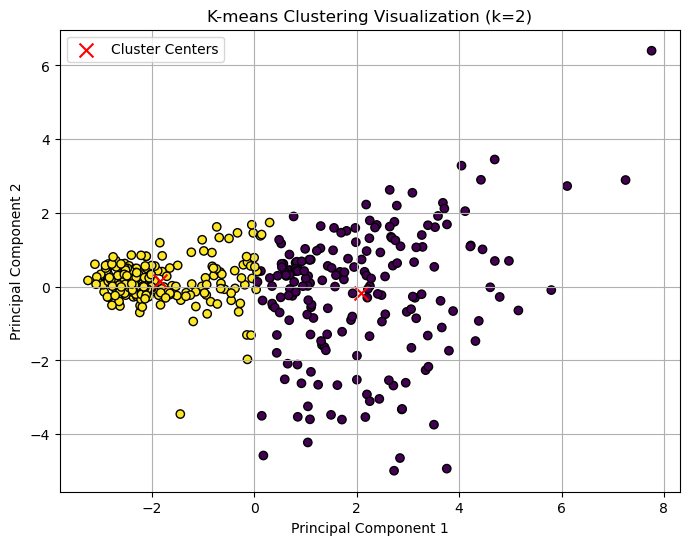

In [176]:
plt.figure(figsize=(8, 6))

principal_components = pca_X.fit_transform(X)
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Plot data points
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100, label='Cluster Centers')

plt.title('K-means Clustering Visualization (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [177]:
y_1d = np.ravel(y)

adjusted_Rand_index = adjusted_rand_score(y_1d, cluster_labels)

adjusted_Rand_index

0.47475212707496756

8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.


In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.7, random_state=0, stratify=y)

9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.

## Algorithm 1: Dicision tree

In [179]:
cs_dt = DecisionTreeClassifier(
    max_depth =30, 
    random_state=1
) 

In [180]:
cs_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1)

[Text(0.6, 0.9, 'hemo <= 0.214\ngini = 0.469\nsamples = 120\nvalue = [75, 45]\nclass = notckd'),
 Text(0.4, 0.7, 'rbcc <= 0.921\ngini = 0.051\nsamples = 76\nvalue = [74, 2]\nclass = notckd'),
 Text(0.3, 0.5, 'sc <= -0.37\ngini = 0.026\nsamples = 75\nvalue = [74, 1]\nclass = notckd'),
 Text(0.2, 0.3, 'pot <= -0.259\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = notckd'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = notckd'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = ckd'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]\nclass = notckd'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = ckd'),
 Text(0.8, 0.7, 'al <= 1.5\ngini = 0.044\nsamples = 44\nvalue = [1, 43]\nclass = ckd'),
 Text(0.7, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]\nclass = ckd'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = notckd')]

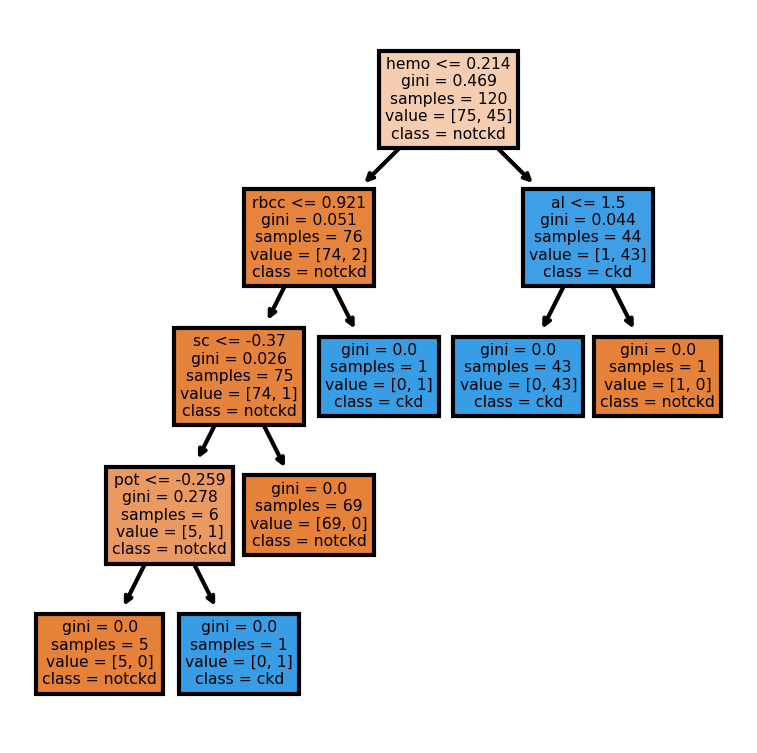

In [181]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (3,3), dpi=300
    )
plot_tree(
    cs_dt, 
    max_depth= 30, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd'], 
    filled = True
    )



In [182]:
pred = cs_dt.predict(X_test)
pred[:5]

array([1, 1, 0, 0, 0], dtype=int8)

In [183]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,No,Yes
True,,
No,156,19
Yes,4,101


In [184]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       175
           1       0.84      0.96      0.90       105

    accuracy                           0.92       280
   macro avg       0.91      0.93      0.91       280
weighted avg       0.93      0.92      0.92       280



## Algorithm 2: KNN

In [185]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm

In [186]:
X1_filled

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,-1,1,0,0,-3.414983e-01,...,0.988022,0.569881,-0.206202,4.812952e-01,1,1,0,0,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,-1,1,0,0,-1.796316e-16,...,-0.421688,-0.098536,-0.818559,8.452553e-16,0,0,0,0,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064e+00,...,-1.006202,-0.878356,-0.308261,8.452553e-16,0,1,0,1,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-3.920223e-01,...,-0.456071,-0.766953,-0.580420,-7.889609e-01,1,0,0,1,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-5.309633e-01,...,-0.318538,-0.432744,-0.376301,-1.049768e-01,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-1.015093e-01,...,1.091172,0.904090,-0.580420,1.881592e-01,0,0,0,0,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-9.225244e-01,...,1.366237,1.683910,-0.206202,1.458415e+00,0,0,0,0,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-6.067493e-01,...,1.125555,1.126896,-0.614440,6.767192e-01,0,0,0,0,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-4.299153e-01,...,0.575424,1.349701,-0.410321,1.165279e+00,0,0,0,0,0,0


In [187]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [200]:
X_train, X_test, y_train, y_test = train_test_split(
    X1_filled, y, test_size=0.25, random_state=0, stratify=y)

In [189]:
logistic_X = LogisticRegression()

In [190]:
logistic_X.fit(X_train, y_train)

/Users/shujiazhang/anaconda3/envs/proj02/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [191]:
pred_prob = logistic_X.predict_proba(X_test)
pred_prob

array([[9.64592681e-01, 3.54073192e-02],
       [7.48284662e-01, 2.51715338e-01],
       [8.45266858e-02, 9.15473314e-01],
       [9.81505763e-01, 1.84942366e-02],
       [1.76563599e-01, 8.23436401e-01],
       [7.01816398e-02, 9.29818360e-01],
       [8.54086740e-01, 1.45913260e-01],
       [9.77637610e-01, 2.23623904e-02],
       [1.48412482e-01, 8.51587518e-01],
       [7.20365827e-01, 2.79634173e-01],
       [9.92214193e-01, 7.78580720e-03],
       [6.33021497e-01, 3.66978503e-01],
       [4.87069504e-02, 9.51293050e-01],
       [8.23336318e-01, 1.76663682e-01],
       [8.76330989e-02, 9.12366901e-01],
       [9.33941337e-01, 6.60586628e-02],
       [9.83039495e-01, 1.69605047e-02],
       [9.62589336e-01, 3.74106639e-02],
       [9.13363037e-01, 8.66369635e-02],
       [6.47761115e-01, 3.52238885e-01],
       [7.45587665e-01, 2.54412335e-01],
       [9.80721282e-01, 1.92787175e-02],
       [8.46893500e-01, 1.53106500e-01],
       [1.22902679e-01, 8.77097321e-01],
       [9.207587

In [192]:
positive_class_prob = pred_prob[:,1]
y_test1=np.ravel(y_test)
df2 = pd.DataFrame(data={'prob': positive_class_prob, 'y_test': y_test1})
df2

,prob,y_test
0,0.035407,0
1,0.251715,0
2,0.915473,1
3,0.018494,0
4,0.823436,1
...,...,...
375,0.166694,0
376,0.027664,0
377,0.018764,0
378,0.058685,0


In [193]:
df = pd.DataFrame(data={'prob0': pred_prob[:,1], 'y_test1': y_test1})

df['y_test_pred'] = df.prob0.map(lambda x: 1 if x > 0.5 else 0)

cm = confusion_matrix(df['y_test1'], df['y_test_pred'])
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[233   5]
 [  1 141]]


In [194]:
total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Accuracy :  0.9842105263157894


In [195]:
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity )

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

Specificity :  0.9789915966386554
Sensitivity :  0.9929577464788732


In [196]:
spam_auc = roc_auc_score(df.y_test1, df.prob0)
print('Logistic: ROC AUC=%.3f' % (spam_auc))

Logistic: ROC AUC=0.999


In [197]:
spam_fpr, spam_tpr, cutoff = roc_curve(df.y_test1, df.prob0)

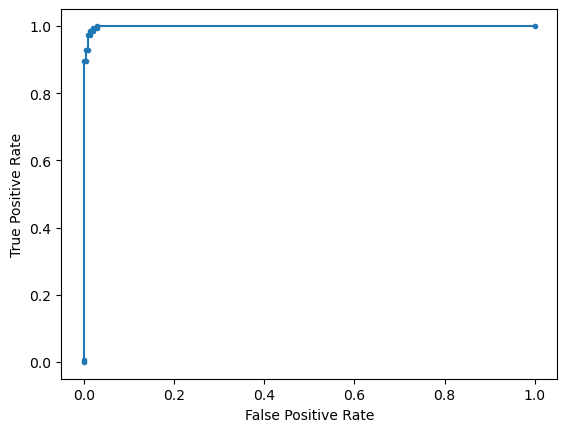

In [198]:
plt.plot(spam_fpr, spam_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [199]:
ks_statistic = np.max(spam_tpr - spam_fpr)
ks_cutoff = cutoff[np.argmax(spam_tpr - spam_fpr)]
ks_cutoff

0.6220918964540516

The optimal cut-off probability cutoff point is 0.54.

10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

15. **Team Contributions:** Document each team member's specific contributions related to the questions above.

16. **Link** to the public GitHub repository.

https://github.com/dail9/3da-assignment6/blob/main/assignment6.ipynb